In [1]:
%load_ext nb_black
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
import urllib.request as req
import tarfile
import os

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

save_file = "aclImdb_v1.tar.gz"
if not os.path.exists(save_file):
    req.urlretrieve(url, save_file)

movie_folder = "aclImdb"
if not os.path.exists(movie_folder):
    with tarfile.open(save_file) as tar:
        tar.extractall()

<IPython.core.display.Javascript object>

In [3]:
def replace_contraction(text):
    contraction_patterns = [
        (r"won\'t", "will not"),
        (r"can\'t", "can not"),
        (r"i\'m", "i am"),
        (r"ain\'t", "is not"),
        (r"(\w+)\'ll", "\g<1> will"),
        (r"(\w+)n\'t", "\g<1> not"),
        (r"(\w+)\'ve", "\g<1> have"),
        (r"(\w+)\'s", "\g<1> is"),
        (r"(\w+)\'re", "\g<1> are"),
        (r"(\w+)\'d", "\g<1> would"),
        (r"&", "and"),
        (r"dammit", "damn it"),
        (r"dont", "do not"),
        (r"wont", "will not"),
        (r"br", " "),
        (r"www", " "),
        (r"http\S+", " "),
        (r"#(\w+)", " "),
        (r"@(\w+)", " "),
        (r"[^\w\s]", " "),
    ]

    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import re
import nltk
import contractions
from bs4 import BeautifulSoup

nltk.download()


def retrieve_reviews(data_folder="/train"):
    movie_reviews = []
    before = []
    sentiments = []
    for s in ("/test", "/train"):
        for index, sentiment in enumerate(["/neg/", "/pos/"]):
            directory = movie_folder + s + sentiment
            for filename in sorted(os.listdir(directory)):
                with open(directory + filename, "r") as f:
                    txt = f.read()
                    before.append(txt)
                    txt = txt.lower()
                    txt = BeautifulSoup(txt, "html.parser").text
                    txt = replace_contraction(txt)
                    txt = re.sub(r"[^a-z ]", "", txt)
                    txt = re.sub(r" +", " ", txt)
                    # remove extra white spaces
                    txt = txt.rstrip()
                    txt = txt.lstrip()
                    txt = txt.strip()
                    while "  " in txt:
                        txt = txt.replace("  ", " ")
                    movie_reviews.append(txt)

                sentiments.append(index)

    return movie_reviews, np.array(sentiments)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


<IPython.core.display.Javascript object>

In [5]:
training_reviews, training_labels = retrieve_reviews()
print(len(training_reviews))
print(training_reviews[0:11])
print(training_labels[0:11])

50000
['once again mr costner has dragged out a movie for far longer than necessary aside from the terrific sea rescue sequences of which there are very few i just did not care about any of the characters most of us have ghosts in the closet and costner is character are realized early on and then forgotten until much later by which time i did not care the character we should really care about is a very cocky overconfident ashton kutcher the problem is he comes off as kid who thinks he is better than anyone else around him and shows no signs of a cluttered closet his only obstacle appears to be winning over costner finally when we are well past the half way point of this stinker costner tells us all about kutcher is ghosts we are told why kutcher is driven to be the best with no prior inkling or foreshadowing no magic here it was all i could do to keep from turning it off an hour in', 'this is an example of why the majority of action films are the same generic and boring there is really

<IPython.core.display.Javascript object>

In [6]:
result = [len(x.split(" ")) for x in training_reviews]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Mean 234.30 words (173.727442)


<IPython.core.display.Javascript object>

In [7]:
movie_df = pd.DataFrame()
movie_df["review"] = training_reviews
movie_df["sentiment"] = training_labels

<IPython.core.display.Javascript object>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

movie_df["count"] = result


def stats_of_freq_distribution(freq_column):
    print("MEAN length of data set :", np.mean(freq_column))
    print("MEDIAN length of data set :", np.median(freq_column))
    print("STD DEV length of data set :", np.std(freq_column))
    print("MAX token of data set :", np.max(freq_column))
    print("MIN token of data set :", np.min(freq_column))


def plot_length_distribution(freq_column):
    plt.hist(freq_column, bins=50)
    plt.xlabel("Length of a sample")
    plt.ylabel("Number of samples")
    plt.title("Sample length distribution")
    plt.show()

<IPython.core.display.Javascript object>

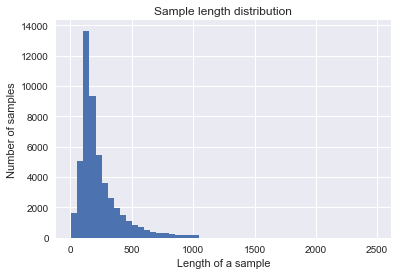

<IPython.core.display.Javascript object>

In [9]:
plot_length_distribution(movie_df["count"])


In [10]:
# mean length of data set
stats_of_freq_distribution(movie_df["count"])

MEAN length of data set : 234.29894
MEDIAN length of data set : 176.0
STD DEV length of data set : 173.72744208925772
MAX token of data set : 2486
MIN token of data set : 6


<IPython.core.display.Javascript object>

In [11]:
movie_df.head(6)

,review,sentiment,count
0,once again mr costner has dragged out a movie ...,0,171
1,this is an example of why the majority of acti...,0,241
2,first of all i hate those moronic rappers who ...,0,224
3,not even the beatles could write songs everyon...,0,320
4,ass pictures movies is not a fitting word for ...,0,237
5,a funny thing happened to me while watching mo...,0,118


<IPython.core.display.Javascript object>

In [12]:
import numpy as np

np.random.seed(0)
movie_df = movie_df.reindex(np.random.permutation(movie_df.index))
movie_df.to_csv("movie.csv", index=False, encoding="utf-8")

<IPython.core.display.Javascript object>

In [13]:
import pandas as pd

movie_df = pd.read_csv("movie.csv", encoding="utf-8")

<IPython.core.display.Javascript object>

In [14]:
movie_df.head(6)

,review,sentiment,count
0,al pacino was once an actor capable of making ...,0,170
1,if you read the book by carl hiaasen the movie...,1,286
2,this movie is sort of a carrie meets heavy met...,1,68
3,this movie was like a bad indie with a list ta...,0,124
4,in the s charlton heston starred in sci fi fli...,1,114
5,turned out to be another failed attempt by the...,0,227


<IPython.core.display.Javascript object>

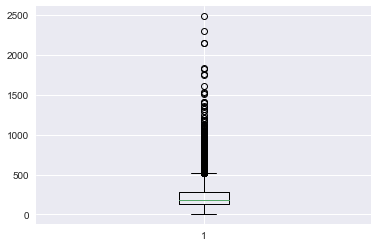

<IPython.core.display.Javascript object>

In [15]:
plt.boxplot(result)
plt.show()